## Random variables

:::{admonition} **What you will learn**

- Summing independent random variables results in another random variable called **sumple sum**. The mean of the sample sum is different from the population mean or expectation which is an exact quantity we want to approximate by sampling.
- The **Law of Large Numbers** is a principle that states that as the number $N$, the sample mean approaches the population mean with a standard deviation falling off as $N^{-1/2}$
- The **Central Limit Theorem (CLT)** tells us that summing independent and identically distributed random variables with well-defined means and variances results in Gaussian distribution regardless of the nature of a random variable. 
- A model of **random walk** describes the erratic, unpredictable motion of atoms and molecules, providing a fundamental model for diffusion processes and molecular motion in fluids.
The number of steps to the right (or left) of a 1D random walker results in a binomial probability distribution. Following CLT binomial distribution in the large N limit can be shown to be well approximated by gaussian with the same mean and variance.

:::

### Introducing random variables

:::{figure-md} markdown-fig
<img src="./figs/RV.png" alt="compton" class="bg-primary mb-1" width="500px">

A random variable is what we interact with in experiments and simulations to infer probability distributions over the sample space.
:::

- **A random variable X** is a variable whose value depends on the realization of experiment or simulations. 
    - $X(\omega)$ is a function from possible outcomes of a sample space $\omega \in \Omega$.
    - For a coin toss $\Omega={H,T}$ $X(H)=+1$ and $X(T)=-1$. Every time the experiment is done, X returns either +1 or -1. We could also make functions of random variables, e.g., every time X=+1, we ear 25 cents, etc. 

- Random variables are classified into two main types: **discrete and continuous.**

    - **Discrete Random Variable:** It assumes a number of distinct values. Discrete random variables are used to model scenarios where outcomes can be counted, such as the number of particles emitted by a radioactive source in a given time interval or the number of photons hitting a detector in a certain period.

    - **Continuous Random Variable:** It can take any value within a continuous range. These variables describe quantities that can vary smoothly, such as the position of a particle in space, the velocity of a molecule in a gas, or the energy levels of an atom.

### Random Numbers in Python 

- The [**numpy.random**](https://numpy.org/doc/stable/reference/random/index.html) module provides highly efficient random number generators, implemented in optimized C code for fast performance.  

- The most commonly used random number generators in NumPy are:  
  - `np.random.rand()` – Generates **uniform** random numbers in the interval \([0,1]\).  
  - `np.random.randn()` – Generates **standard normal** (Gaussian) random numbers with a **mean of 0** and **variance of 1**.  

- Since random numbers are inherently unpredictable, running the same code multiple times will produce different results. To ensure **reproducibility**, you can set a fixed random seed before generating random numbers using:  

  ```python
  np.random.seed(8376743)
  ```

  Setting the seed ensures that the same sequence of random numbers is generated each time the code runs.

[0.86780201 0.01653899 0.8536026  0.74150359 0.10496468 0.50911851
 0.0723962  0.01799581 0.99249069 0.72608125 0.62846196 0.25680721
 0.80627924 0.66165572 0.18830375 0.54812734 0.49847098 0.87938284
 0.40500846 0.11207135 0.3216652  0.41129528 0.55992372 0.41376843
 0.87925271 0.07087174 0.5159967  0.09132855 0.80607358 0.85867967
 0.96901096 0.3209932  0.51779893 0.45963848 0.14147668 0.55460727
 0.96331329 0.19190256 0.2776842  0.43308297 0.4559027  0.81219753
 0.41670081 0.29700201 0.41279117 0.23075    0.03388506 0.60000712
 0.6960129  0.49487564]


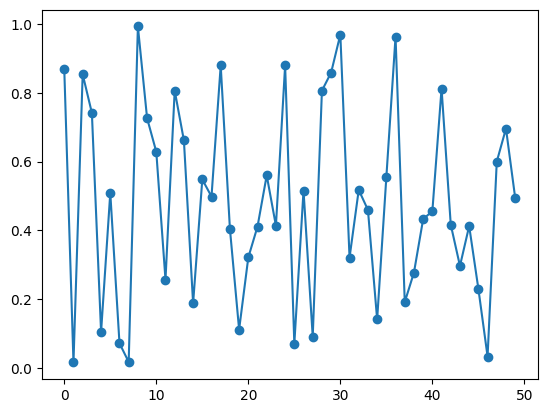

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(50)

print(X)
plt.plot(X, '-o')

### **Probability Distribution of a Random Variable**

- For any random variable $ X $, we are interested in finding the probability distribution over its possible values $ x $, denoted as $ p_X(x) $.
- It is important to distinguish between:
  - $ x $, which represents a **specific value** the variable can take (e.g., $ 1,2, \dots, 6 $ for a die).
  - $ X $, which is the **random variable itself**, generating values $x$ according to the probability distribution $p(x)$.

**What is a Histogram**

- A histogram provides an empirical estimate of a distribution by grouping data into bins and counting occurrences within each bin.  
- For **continuous distributions**, histograms approximate the **probability density function (PDF)**.  
- For **discrete distributions**, histograms approximate the **probability mass function (PMF)**.  
- The choice of **bin width** significantly impacts visualization:  
  - Too few bins can obscure details. Too many bins can introduce noise, making patterns less clear.  


**Histogramming in numpy**
- `np.histogram(X, bins=20)`: Divides the range of values of X into e.g. 20 bins and counts how many data points fall into each bin. histogram returns:
    - `bin_edges`: The boundaries of each bin.
    - `counts`: The number of values in each bin.

**Visualization**
- `plt.bar(...)`: Plots the histogram using a bar chart.
- `plt.hist()`: Can directly plot histogram of random variable
- The Seaborn library provides convenient visualization tools for random numbers. For example, ```sns.histplot(np.random.randn(1000), kde=True)``` can be used to visualize the distribution of 1000 normally distributed random numbers with a smooth density curve.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 random values from a normal distribution
X = np.random.rand(1000)

# Compute the histogram using NumPy
counts, bin_edges = np.histogram(X, bins=20)

# Print the histogram X
print("Bin edges:", bin_edges)
print("Counts per bin:", counts)

# Plot the histogram
plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor='black', alpha=0.7)
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Histogram of a Random Variable")
plt.show()

In [ ]:
import seaborn as sns

sns.histplot(np.random.rand(1000), kde=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson

# Generate data for continuous distribution (Normal)
np.random.seed(42)
x_continuous = np.random.normal(loc=0, scale=1, size=1000)

# Generate data for discrete distribution (Poisson)
x_discrete = np.random.poisson(lam=3, size=1000)

# Define x values for theoretical curves
x_cont_range = np.linspace(-4, 4, 1000)
x_disc_range = np.arange(0, 10)

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Continuous distribution (Normal)
axes[0].hist(x_continuous, bins=30, density=True, alpha=0.6, color='b', edgecolor='black', label="Histogram")
axes[0].plot(x_cont_range, norm.pdf(x_cont_range, loc=0, scale=1), 'r-', lw=2, label="PDF")
axes[0].set_title("Continuous Distribution (Normal)")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].legend()

# Discrete distribution (Poisson)
axes[1].hist(x_discrete, bins=np.arange(11)-0.5, density=True, alpha=0.6, color='g', edgecolor='black', label="Histogram")
axes[1].scatter(x_disc_range, poisson.pmf(x_disc_range, mu=3), color='r', label="PMF", zorder=3)
axes[1].set_title("Discrete Distribution (Poisson)")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Probability")
axes[1].legend()

plt.tight_layout()
plt.show()


### **Expectation and Variance**

- The expectation of a random variable, $ E[x] $, represents the **theoretical mean**, distinguishing it from the **sample mean** computed in simulations.
- For example, consider the difference between:
  - The average height of people computed from a sample of cities.
  - The true mean height of the entire world population.
  
- As the sample size increases, the sample mean **converges to** the expectation.
- Expectation can be applied to variable or any function $f(x)$. 
- An important type of expectation is applied to the square of mean subtracted $x$ which quantifies **variance**, or **fluctuations** of $x$.

:::{admonition} **Expectation of a Random Variable**
:class: important

$$
E[f(x)] = \int f(x) \cdot p(x) \,dx
$$

$$
E[x] = \int x \cdot p(x) \,dx = \mu
$$

:::

:::{admonition} **Variance as the Expectation of Mean Fluctuations**
:class: important

$$
V[x] = E[(x - E[x])^2] = E[x^2] - E[x]^2 = \sigma^2
$$

- We often use the shorthand notation for variance:  
  $\sigma^2 = V[x]$, where $ \sigma $ is the **standard deviation**.

:::


#### Binomial

- A an example of discrete distribution Binomial is defined by a Probability Mass Function (PMF)

$$P(n |p, N) =  \frac{N!}{(N-n)! n!}p^n (1-p)^{N-n}$$

- $E[n] = Np$
- $V[n] = 4Np(1-p)$


**Random Variable**

- $B(n, p)$ modeled by ```np.random.binomial(n, p, size)```

In [ ]:
r = np.random.binomial(n=1, p=0.6, size=2000) 

fig, ax = plt.subplots(ncols=2) 
ax[0].plot(r,  color='blue', label='trajectory')
ax[1].hist(r,  density=True, color='red',  label = 'histogram')


ax[0].set_xlabel('Samples of RN')
ax[0].set_ylabel('Values of RN')

ax[1].set_xlabel('Values of RN')
ax[1].set_ylabel('Probability Density')
fig.legend();
fig.tight_layout()

#### Gaussian

- A an example of continuous distribution Gaussian is defined by a Probability Distribution Function

$$P(x |\mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- $E[x] = \mu$
- $V[x] = \sigma^2$

**Random Variable**

- $N(a, b)$ modeled by ```np.random.normal(loc,scale, size=(N, M))```
- $N(0, 1)$ modeled by ```np.random.randn(N, M, P, ...)```

In [ ]:
# For a standard normal with sigma=1, mu=0
r = np.random.randn(200)

fig, ax = plt.subplots(ncols=2) 
ax[0].plot(r,  color='blue', label='trajectory')
ax[1].hist(r,  density=True, color='red',  label = 'histogram')


ax[0].set_xlabel('Samples of RN')
ax[0].set_ylabel('Values of RN')

ax[1].set_xlabel('Values of RN')
ax[1].set_ylabel('Probability Density')
fig.legend();
fig.tight_layout()

#### Uniform Distribution

- A simple example of a continuous distribution is the **Uniform distribution**, where all values within a given range are equally likely. It is defined by the **Probability Density Function (PDF)**:

$$
P(x | a, b) =
\begin{cases} 
\frac{1}{b - a}, & a \leq x \leq b \\ 
0, & \text{otherwise}
\end{cases}
$$

- **Expectation and Variance:**
  - $E[x] = \frac{a + b}{2}$
  - $V[x] = \frac{(b - a)^2}{12}$

**Random Variable**  

- $U(a, b)$ is modeled by:  
  ```python
  np.random.uniform(low, high, size=(N, M))
  ```
- $U(0,1)$ (standard uniform) is modeled by:  
  ```python
  np.random.rand(N, M, P, ...)
  ```


In [ ]:
# For a standard uniform
r = np.random.random(200)

fig, ax = plt.subplots(ncols=2) 
ax[0].plot(r,  color='blue', label='trajectory')
ax[1].hist(r,  density=True, color='red',  label = 'histogram')


ax[0].set_xlabel('Samples of RN')
ax[0].set_ylabel('Values of RN')

ax[1].set_xlabel('Values of RN')
ax[1].set_ylabel('Probability Density')
fig.legend();
fig.tight_layout()

#### Exact vs sampled probability distributions

In [ ]:
# Simplified and optimized version of the code
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate x values and compute standard normal PDF
x = np.linspace(-4, 4, 200)
px = norm.pdf(x)

# Generate random samples
r = np.random.randn(1000)

# Plot histogram and theoretical normal distribution
plt.hist(r, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', 
         label=f'Sampled: mean={r.mean():.2f}, var={r.var():.2f}')
         
plt.plot(x, px, 'k-', linewidth=2, label='Exact: mean=0, var=1')

# Formatting
plt.legend(loc="upper left", fontsize=10)
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$p(x)$', fontsize=14)
plt.title("Comparison of Sampled Data with Normal Distribution", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


### Transforming Random Variables  

- When a random variable $X $ is transformed by adding, multiplying by a constant, or applying a function $ Y = f(X) $, its probability distribution changes accordingly from $ p(x) $ to $ p(y) $.  
- Two commonly used transformations involve multiplying or adding constants to random variables:

  - **Generating a Gaussian (Normal) distribution** from a standard normal:  

    $$
    N(\mu, \sigma^2) = \mu + \sigma \cdot N(0,1)
    $$

  - **Generating a Uniform distribution** from a standard uniform:  

    $$
    U(a, b) = (b - a) \cdot U(0,1) + a
    $$


:::{admonition} **Transforming Random Variables**
:class: dropdown, tip

- When transforming a random variable $ X $ to a new variable $ Y = f(X) $, the probability density functions are related by a **Jacobian factor** to account for how the transformation stretches or compresses the distribution:

$$
p(x) dx = p(y) dy
$$

which gives:

$$
p(y) = p(x) \cdot \Bigg| \frac{dx}{dy} \Bigg|
$$

- **Examples of Simple Transformations:**
  1. **Addition:** $ Y = X + a $
     - The probability remains unchanged except for a shift:  

       $$
       p(y) = p(x + a) \cdot 1
       $$

  2. **Multiplication:** $ Y = aX $
     - The distribution scales with a factor $ \frac{1}{|a|} $:  

       $$
       p(y) = p(x) \cdot \frac{1}{|a|}
       $$

- These transformations yield useful properties:
  - **Shifting the Mean:**  

    $$
    E[X + a] = E[X] + a
    $$

  - **Scaling the Variance:**  

    $$
    V[aX] = a^2 V[X]
    $$

- Using these properties, we can generate:

  - A **Gaussian (Normal) distribution** from a standard normal:

    $$
    N(\mu, \sigma^2) = \mu + \sigma \cdot N(0,1)
    $$

  - A **Uniform distribution** from a standard uniform:

    $$
    U(a, b) = (b - a) \cdot U(0,1) + a
    $$
    
:::

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu, sigma = 5, 2  # Mean and standard deviation for Gaussian
a, b = 2, 8       # Bounds for Uniform

# Generate standard distributions
std_normal = np.random.randn(10000)  # N(0,1)
std_uniform = np.random.rand(10000)  # U(0,1)

# Transform distributions
normal_dist = mu + sigma * std_normal  # N(mu, sigma^2)
uniform_dist = a + (b - a) * std_uniform  # U(a, b)

# Plot Distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Normal Distribution
axes[0].hist(normal_dist, bins=40, density=True, alpha=0.6, color='b', edgecolor='black')
axes[0].set_title(f"Transformed Normal Distribution N({mu}, {sigma}²)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("Density")

# Uniform Distribution
axes[1].hist(uniform_dist, bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
axes[1].set_title(f"Transformed Uniform Distribution U({a}, {b})")
axes[1].set_xlabel("x")
axes[1].set_ylabel("Density")

plt.tight_layout()
plt.show()


### Sum of Two Random Variables

- Consider the sum of two random variables, such as:
  - The sum of numbers obtained from rolling two dice.
  - The sum of two coin flips (e.g., heads = 1, tails = 0).
  - Sum of kinetic eneries of ideal gas. 

$$
X = X_1 + X_2
$$

- The sum of random variables is itself a random variable! 
- We want to understand how to described the properties of summed random variables  as they offer a prototype of how large systems emerge froms mall components. 
- Given probability distirbution of $X_1$ and $X_2$ how do we find probability distribution of X?


:::{admonition} **Play with sums of RVs**
:class: note, dropdown
Take unifiorm random number between 0 an 1. Generate 10, 20, 100 and see how are they behaving. Here are some helpful tips to generate Random Variables. 
- ```np.random.random(n)``` generates array of random variables of size $n$
- ```np.random.random((n, m))``` generates array of random variables of shape $(n, m)$
:::


### Expectation and Variance of the Sum

- Expectation is always a **linear operator**, which follows from the definition of expectation and the linearity of integration:

$$
E[X_1 + X_2] = E[X_1] + E[X_2]
$$

- However, variance is **not** generally a linear operator. To see this let us write explicit formula first:

$$
V[X_1 + X_2] = E\left[(X_1 + X_2 - E[X_1 + X_2])^2\right] 
$$

- Defining the **mean-subtracted variables**: $Y_i = X_i - E[X_i]$ we express variance of sum in terms of variances of component random variables 

$$
V[X_1 + X_2] = E\left[(X_1 - E[X_1] + X_2 - E[X_2])^2\right] = E\left[(Y_1 + Y_2)^2\right]
$$

- Since $ V[X_i] = E[Y_i^2] $, this simplifies to:

$$
V[X_1 + X_2] = E[Y^2_1] + V[Y^2_2] + 2E[Y_1 Y_2] = V[X_1] + V[X_2] + 2 Cov[X_1, X_2]
$$

- The cross term is called **Covariance** which measures the degree to which two random variables **vary together**.
- To obtain a **scale-independent** measure, we then define the **correlation coefficient**. Corr the sign of which shows if correlation is positivie or negative. 

:::{admonition} **Covariance and Correlation of Two Random Variables**  
:class: important  

$$
\text{Cov}[X_1, X_2] = E[(X_1 - E[X_1])(X_2 - E[X_2])]
$$

$$
\text{Corr}[X_1, X_2] = \frac{\text{Cov}[X_1, X_2]}{\sigma_{X_1} \sigma_{X_2}}
$$

:::


- In the special case where $X_1 $ and $X_2 $ are **statistically independent**, covariance (or correlation) is zero and we have additivity of variances!


$$V[X_1+X_2] = V[X_1]+V[X_2]$$

- This result is **fundamental** in statistical mechanics, probability theory, and the sciences, as it explains why variances add for independent random variables.


In [ ]:
import seaborn as sns

# Generate random data with different correlation coefficients
np.random.seed(42)
num_points = 300

# Define correlation levels
correlations = [0.0, 0.3, 0.6, 0.9]
fig, axes = plt.subplots(1, len(correlations), figsize=(16, 4))

for i, corr in enumerate(correlations):
    mean = [0, 0]
    cov_matrix = [[1, corr], [corr, 1]]  # Covariance matrix based on correlation
    data = np.random.multivariate_normal(mean, cov_matrix, num_points)
    
    ax = axes[i]
    sns.scatterplot(x=data[:, 0], y=data[:, 1], alpha=0.6, ax=ax, edgecolor=None)
    ax.set_title(f'Correlation = {corr}', fontsize=12)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    
# Overall title
plt.suptitle("Illustration of Correlation Coefficient Between Two Random Variables", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

### Sum of $ N $ Random Variables  

- Consider a sequence of **independent and identically distributed (i.i.d.)** random variables, $ X_1, X_2, \ldots, X_n $.  
- Since they are **identically distributed**, each variable has a well-defined **mean** $ \mu $ and **variance** $ \sigma^2 $.  
- Our goal is to understand how the **sum** and **mean** of these variables depend on the sample size $ n $.
- For convenience we also introduce notation for **zero mean random variables** $Y_i = X_i-E[X_i]$, since $E[Y_i]=0$

:::{admonition} **Sample Sum and Sample Mean**  
:class: important  

$$
S_n = \sum_{i=1}^{n} X_i, \quad M_n = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

- $ S_n $ is the **sample sum**, and $ M_n $ is the **sample mean**.  
- These quantities fluctuate with sample size $ n $, but we expect them to **converge to their expectations** for large $ n $ 

:::



:::{admonition} **Mean and Variance of the Sum of i.i.d. Random Variables**  
:class: important  

- **Expectation of the Sum:**  

$$
E[S_n] = E\left[ \sum_{i=1}^{n} X_i \right] = \sum_{i=1}^{n} E[X_i] = n\mu
$$

- **Variance of the Sum:**  

$$
V[S_n] = E\left[ (S_n - n\mu)^2 \right] = \Bigg[\sum_{i=1}^{n}  Y_i \Bigg]^2 = \sum_{i=1}^{n} \sum_{j=1}^{n}E[Y_i Y_j] = \sum_{i=1}^{n} V[X_i] = n\sigma^2
$$
:::


### Law of Large Numbers

- For the **sample mean** the result of summatiion of i.i.d variables implies

$$
E[M_n] = \frac{1}{n} E[S_n] = \mu
$$

$$
V[M_n] = \frac{1}{n^2} V[S_n] = \frac{\sigma^2}{n}
$$

- Thus, the sample mean is an **unbiased estimator** of $ \mu $, and its variance decreases as $ 1/n $, meaning that the estimate becomes more stable as $ n $ increases.


:::{admonition} **Law of Large Numbers (LLN)**
:class: important

$$
E[M_n] \to \mu
$$  

$$V[M_n] \to \sigma^2 / n$$

**Implication:**  
- The sample mean provides a reliable estimate of $\mu$ for large $n$.  
- The variance of $M_n$ decreases as , meaning fluctuations shrink as $1/\sqrt{n}$.  
- This justifies ensemble averaging in statistical mechanics, ensuring macroscopic observables (e.g., temperature, pressure) are stable and predictable.
:::

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of trials and runs
N, runs = int(1e5), 30

# Store fractions of heads for each trial in each run
fractions = np.zeros((runs, N))

# Simulate coin tosses
for run in range(runs):
    # Generate coin tosses (0 for tails, 1 for heads)
    tosses = np.random.randint(2, size=N)
    # Calculate cumulative sum to get the number of heads up to each trial
    cum_heads = np.cumsum(tosses)
    # Calculate fraction of heads up to each trial
    fractions[run, :] = cum_heads / np.arange(1, N+1)

# Plotting
plt.figure(figsize=(14, 8))

# Plot all runs with low opacity
for run in range(runs):
    plt.plot(fractions[run, :], color='grey', alpha=0.3)

# Highlight first run
plt.semilogx(fractions[0, :], color='blue', linewidth=2, label='Highlighted Run')

# Expected value line
plt.axhline(y=0.5, color='red', linestyle='--', label='Expected Value (0.5)')
plt.xlabel('Number of Trials')
plt.ylabel('Fraction of Heads')
plt.title('Law of Large Numbers: Fraction of Heads in Coin Tossing')
plt.legend()

### The Central Limit Theorem  (CLT)

- **Central Limit Theorem** asserts that the probability distribution function or **PDF** of sum of random variables becomes gaussian distribution with mean $n\mu$ and $n\sigma^2$. 
- Note that CLT is based on assumption that the **mean and variance**, $\mu$ and $\sigma^2$, **are finite!**. Thus, CLT does not hold for certain power-law distributed random variables. 

:::{admonition} **Central Limit Theorem  (CLT)**
:class: important

- Sum of any i.i.d variables (even if they are not gaussian) leads to normally distributed random variable (the sum $s_n$)

$$X_1 +X_2+...+X_n \rightarrow N(n\mu, n\sigma^2)$$

- The probability density function (PDF) of $S_n$ is approaching gaussian: 

$$p(s) = \frac{1}{(2\pi  n\sigma^2)^{1/2}}e^{-\frac{(s-n\mu)^2}{2 n\sigma^2}}$$

:::

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
num_samples = 10000  # Number of samples per distribution
num_bins = 50  # Number of bins for histogram
sample_sizes = [1, 2, 5, 10, 30]  # Different sample sizes
bin_edges = np.linspace(0, 1, num_bins + 1)

# Create a figure with a 3D axis
fig = plt.figure(figsize=(10, 7))  # Initialize the figure
ax = fig.add_subplot(111, projection='3d')

# Generate distributions and plot stacked histograms
for i, n in enumerate(sample_sizes):
    samples = np.mean(np.random.uniform(0, 1, (num_samples, n)), axis=1)  # Compute sample means

    hist, bins = np.histogram(samples, bins=bin_edges, density=True)

    # Centers of bins
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Offset along the y-axis for stacking
    y_offset = i  

    # Plot histogram as bars
    ax.bar(bin_centers, hist, zs=y_offset, zdir='y', alpha=0.7, width=0.02, edgecolor='black', label=f'n={n}')

# Labels and title
ax.set_xlabel('Sample Mean Bins', fontsize=12)
ax.set_ylabel('Sample Size (n)', fontsize=12)
ax.set_zlabel('Probability Density', fontsize=12)
ax.set_yticks(range(len(sample_sizes)))
ax.set_yticklabels([f'n={n}' for n in sample_sizes])
ax.set_title("Illustrating CLT with sum of Uniform Random Numbers", fontsize=14)

plt.show()


#### Standardized random variables

$$S_n = \sum^{n}_{i=1} X_i \rightarrow N(n\mu, n\sigma^2)$$

- The CLT motivates us to consuder dividing sum by $n^{1/2}$ and subtracting the mean which gives us another gaussian distributed variable, a more simple one with no parameters!

$$\frac{1}{\sigma n^{1/2} }N(n\mu, n\sigma^2)- n\mu  = N(0,1)$$

- The process of de-meaning and scaling random variable by $\sigma$ is called **standardization** which gives us standard random variabls defined as $E[X]=0$, and $V[X]=1$. 
- We can standardize variables before or after sum. 

$$Z_i = (X_i - \mu)/\sigma$$

$$S'_n = \frac{S_n - n\mu}{n^{1/2}\sigma}$$

- Notice again that **we are dividing the sum by $n^{1/2}$**. If we were to devide sum by $n$ then we have mean the variance of which goes. This would be Law of Large Numbers. 


In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Number of coin tosses in each experiment, number of experiments
N, runs = 1000, 10000  

# Simulate coin tosses: num_experiments rows, num_tosses_per_experiment columns
tosses = np.random.randint(2, size=(N, runs))

# Calculate sums of each run
Sn = np.sum(tosses, axis=0)

# Compute numerical mean and standard deviation of Sn
mu_Sn = np.mean(Sn)  
sigma_Sn = np.std(Sn, ddof=1)  # Using sample standard deviation (ddof=1)

# Compute z-scores numerically
z = (Sn - mu_Sn) / sigma_Sn

# Plot histogram of z-scores
plt.figure()
plt.hist(z, density=True, bins=40, alpha=0.6, label="Simulated")
plt.title('Distribution of Standardized Sums of Coin Tosses')
plt.xlabel('Standardized Sum (Z-score)')
plt.ylabel('Density')

# Overlay standard normal distribution
zs = np.linspace(z.min(), z.max(), 1000)
plt.plot(zs, norm.pdf(zs), 'k', label='N(0,1)')
plt.legend()
plt.show()


:::{admonition} **Example of CLT applied to random walk problem**
:class: note, dropdown

Applying the formulas to random walk model we get mean and variance for single step

$$E[X_1] = f \cdot 1 + (1-f) \cdot (-1) = 2f-1$$ 

$$V[X_1] = E[X^2_1] -  E[X_1]^2 = f \cdot 1^2+ (1-f) (-1)^2 - (2f-1)^2 = 4 f(1-f)$$

Since steps of a random walker are independent we can compute the variance of a total displacement by multiplying mean and varaince of a single step by N 

$$E[x]=N(2f -1)$$

$$V[x]=N\bar{\sigma^2_1} = 4Nf (1-f)$$ 

The variance of the mean $\bar{x} = x/N$ would then be:

$$V[\bar{x}] = \frac{4f (1-f)}{N}$$ 

::

### Simulating a 1D unbiased random walk 

- Each random walker will be modeled by a random variable $X_i$, assuming +1 or -1 values at every step. We will run N random walkers (rows) over n steps (columns)
- We then take **cumulative sum  over n steps** thereby summing n random variables for **N walkers**. This will be done via a convenient ```np.cumsum()``` method.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rw_1d(n, N):
    """
    Simulates a 1D symmetric random walk.

    Parameters:
    n (int): Number of steps.
    N (int): Number of walkers.

    Returns:
    np.ndarray: A (n, N) array where each column represents a walker's trajectory.
    """
    
    # Generate random steps (-1 or +1) for all walkers
    steps = np.random.choice([-1, 1], size=(n, N))
    
    # Compute cumulative sum to get displacement
    rw = np.cumsum(steps, axis=0)

    # Ensure the initial position is zero
    rw = np.vstack([np.zeros(N), rw])  # Adds a row of zeros at the start

    return rw

# Example usage: Simulate and plot a few random walks
n_steps = 1000
n_walkers = 3
rw = rw_1d(n_steps, n_walkers)

plt.plot(rw)
plt.ylabel('X (displacement)')
plt.xlabel('n (steps)')
plt.title('1D Random Walk')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Simulate 1D random walk
def rw_1d(n_max, N):
    """Generates a 1D random walk for N walkers over n_max steps."""
    steps = np.random.choice([-1, 1], size=(n_max, N))  # Random steps
    return np.cumsum(steps, axis=0)  # Cumulative sum gives positions

# Parameters
n_max = 1000  # Number of steps
N_max = 1000  # Number of walkers
rw = rw_1d(n_max, N_max)

# Define time snapshots
snapshots = [10, 100, 500, 900]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=len(snapshots), figsize=(15, 6), constrained_layout=True)

for i, n in enumerate(snapshots):
    # Plot random walk trajectories
    ax = axes[0, i]
    ax.plot(rw[:, :50], alpha=0.3)  # Show 50 trajectories for clarity
    ax.axvline(x=n, color='black', lw=2, linestyle="--")  # Mark current time step
    ax.set_xlabel('Step (n)')
    ax.set_ylabel('Position (X)')
    ax.set_title(f'Step n = {n}')

    # Histogram of positions at step n
    ax_hist = axes[1, i]
    ax_hist.hist(rw[n, :], bins=30, color='orange', density=True, alpha=0.6, label=f'n = {n}')
    
    # Gaussian overlay
    x = np.linspace(-100, 100, 1000)
    y = stats.norm.pdf(x, loc=0, scale=np.sqrt(n))
    ax_hist.plot(x, y, color='black', lw=2, label='N(0,1)')

    ax_hist.set_xlim([-100, 100])
    ax_hist.legend()
    ax_hist.set_title(f'$\sigma^2$ / n = {np.var(rw[n - 1, :]) / n:.3f}')

# Show plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rw_2d(n, N):
    """
    Simulates a 2D symmetric random walk.

    Parameters:
    n (int): Number of steps.
    N (int): Number of trajectories.

    Returns:
    np.ndarray: A (n+1, N, 2) array where each trajectory is stored in the last dimension.
    """
    
    # Define possible step directions (right, up, left, down)
    steps = np.array([(1, 0), (0, 1), (-1, 0), (0, -1)])
    
    # Generate random step indices and map to step directions
    random_steps = steps[np.random.choice(4, size=(n, N))]
    
    # Prepend an initial position at (0,0) for all walkers
    rw = np.zeros((n + 1, N, 2), dtype=int)
    rw[1:] = np.cumsum(random_steps, axis=0)  # Compute displacement over time

    return rw

# Example usage: Simulate and plot first three random walkers
n_steps = 1000
n_walkers = 100
traj = rw_2d(n_steps, n_walkers)

plt.plot(traj[:, :3, 0], traj[:, :3, 1])  # Plot first three random walkers
plt.xlabel('X (displacement)')
plt.ylabel('Y (displacement)')
plt.title('2D Random Walk')
plt.show()


In [ ]:
# Re-import necessary libraries due to execution state reset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

# Parameters
num_steps = 200  # Number of steps in the random walk
step_size = 1  # Step size

# Generate random steps in 3D
np.random.seed(42)
steps = np.random.choice([-step_size, step_size], size=(num_steps, 3))  # Random steps in x, y, z
positions = np.cumsum(steps, axis=0)  # Cumulative sum to get positions

# Create figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([positions[:, 0].min()-1, positions[:, 0].max()+1])
ax.set_ylim([positions[:, 1].min()-1, positions[:, 1].max()+1])
ax.set_zlim([positions[:, 2].min()-1, positions[:, 2].max()+1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Random Walk')

# Initialize the line and point
line, = ax.plot([], [], [], 'b-', lw=2)
point, = ax.plot([], [], [], 'ro')

# Update function for animation
def update(frame):
    line.set_data(positions[:frame+1, 0], positions[:frame+1, 1])
    line.set_3d_properties(positions[:frame+1, 2])
    point.set_data([positions[frame, 0]], [positions[frame, 1]])
    point.set_3d_properties([positions[frame, 2]])
    return line, point

# Create animation
ani = animation.FuncAnimation(fig, update, frames=num_steps, interval=50, blit=False)

# Convert animation to HTML
html_anim = HTML(ani.to_jshtml())
plt.close(fig)  # Prevent duplicate display

# Display the animation
html_anim


### Problems

#### Problem 1 Binomial as generator of Gaussian and Poisson distributions

- Show that in large number limit binomial distribution tends to gaussian. Show is by expanding binomial distirbution $logp(n)$ in power series showing that terms beyond quadratic can be ignored. 

- In the limit $N\rightarrow \infty$ but for very small values of $p \rightarrow 0$ such that $\lambda =pN=const$ there is another distribution that better approximates Binomial distribution: $p(x)=\frac{\lambda^k}{k!}e^{-\lambda} $ It is known as Poisson distribution. <br>
Poisson distribution is an excellent approximation for probabilities of rare events. Such as, infrequently firing neurons in the brain, radioactive decay events of Plutonium or rains in the desert. <br>  Derive Poisson distribution by taking the limit of $p\rightarrow 0$ in binomial distribution.

- Using numpy and matplotlib plot binomial probability distribution
against Gaussian and Poisson distributions for different values of N=(10,100,1000,10000). <br>
- For a value N=10000 do four plots with the following values 
p=0.0001, 0.001, 0.01, 0.1. You can use  subplot functionality to make a pretty 4 column plot. (See plotting module)

```python
fig, ax =  plt.subplots(nrows=1, ncols=4)
ax[0].plot()
ax[1].plot()
ax[2].plot()
ax[3].plot()
```

####  Problem-2 Confined diffusion.

Simulate 2D random walk in a circular confinement. Re-write 2D random walk  code to simulate diffusion of a particle which is stuck inside a sphere. 
Study how root mean square deviation of position scales with time. 
- Carry out simulations for different confinement sizes. 
- Make plots of simulated trajectories.

#### Problem-3 Return to the origin!

- Simulate random walk in 1D and 2D for a different number of steps $N=10, 10^2,10^3, 10^4, 10^5$
- Compute average number of returns to the origin $\langle n_{orig} \rangle$. That is number of times a random walker returns to the origin $0$ for 1D  or (0,0)$ for 2D . You may want to use some 1000 trajectories to obtain average. 
- Plot how $\langle n_{orig} \rangle$ depends on number of steps N for 1D and 2D walker.

####  Problem-4 Breaking the CLT; Cauchy vs Normal random walk in 2D

For this problem we are going to simulate two kinds of random walks in continuum space (not lattice): Levy flights and Normal distributd random walk. 

To simulate a 2D continuum space random walk we need to generate random step sizes $r_x$, $r_y$. 
Also you will need unifrom random namber to sample angles in 2D giving you a conitnuum random walk in 2D space: $x = r_x sin\theta$ and $y=r_ycos\theta$

- Normally: $r\sim N(0,1)$
- Cauchy distribution (long tails, infinite variance) $r\sim Cauchy(0,1)$
- Unform angles $\theta \sim U(0,1)$

Visualize random walk using matplotlib and study statistics of random walkers the way that is done for normal random walk/brownian motion examples!

#### Problem-5 Continuous time random walk (CTRW)

Simulate 1D random walk but instead of picking times at regular intervals pick them from  exponential distribution. <br>
Hint: you may want to use random variables from scipy.stats.exp <br>

[scipy.stats.expon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html) <br>

Study the root mean square deviation as a function of exponential decay parameter $\lambda$ of exponential distribution $e^{-\lambda x}$. 